## <center>Лабораторна робота №2.</center > <center>Побудова та оцiнювання якостi моделей класифiкацiї та регресiї засобами бiблiотеки Scikit-Learn Python</center>

### Завдання

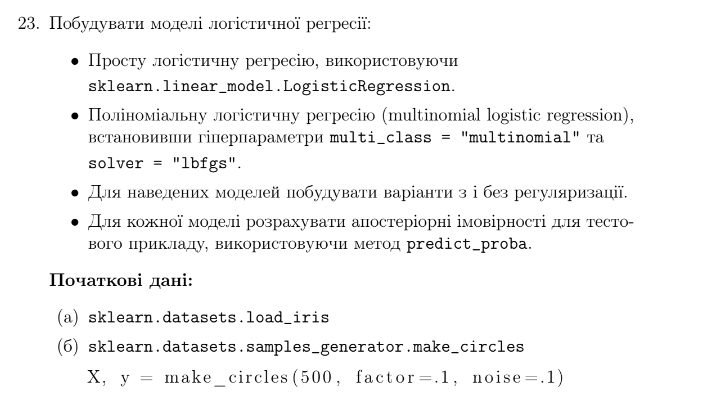

Спочатку імпортуємо усі модулі, методи та атрибути, з якими будемо далі працювати:

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import PrecisionRecallDisplay

### <center>Працюємо з датасетом ірисів</center>

In [80]:
# завантажуємо необхідні дані з модуля scikit-learn

iris = datasets.load_iris()

In [81]:
# Сформуємо DataFrame з отриманих даних - далі це знадобиться у роботі

x_iris = iris.data
y_iris = iris.target
names = iris.target_names

df_iris = pd.DataFrame(x_iris, columns=iris.feature_names)
df_iris['species'] = y_iris
df_iris['species'] = df_iris['species'].replace(to_replace= [0, 1, 2], 
                                      value = ['setosa', 'versicolor', 'virginica'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 1.Візуалізація даних

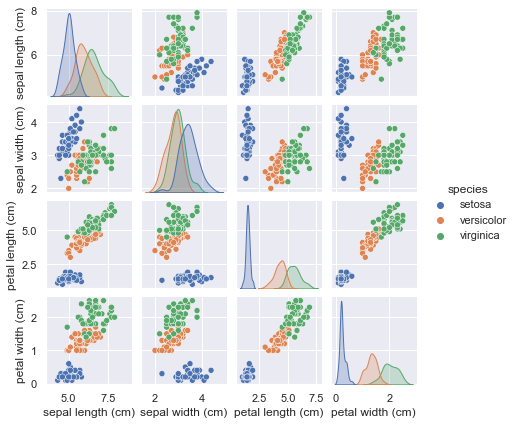

In [82]:
# побудуємо парні зв'язки у наборі даних з 4-х ознак(features)

sns.set()
sns.pairplot(df_iris, hue='species', height=1.5);

### 2. Навчальна та валідаційна вибірки: розбиття

In [99]:
# застосуємо перший спосіб розподілу даних - через функцію train_test_split()
# Розділили дані на 80% навчальної вибірки і 20% - валідаційної

X_train, X_test, y_train, y_test = train_test_split(x_iris, y_iris, test_size=0.2, random_state=1)

### 3. Побудова моделей

In [84]:
# побудуємо просту логістичну регресію
simple_lr = LogisticRegression(max_iter=10000)
simple_lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [85]:
# і також поліноміальну
multi_lr = LogisticRegression(solver='lbfgs',multi_class='multinomial', max_iter=10000)
multi_lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

### 4. Графічне представлення моделі

У випадку логістичної регресії - це будуть границі рішень(Decision Boundaries) за двома ознаками.
Вони представлені нижче у пункті 8.

### 5. Прогнози на основі побудованої моделей

In [86]:
y_pred_smpl = simple_lr.predict(X_test)
y_pred_mlt = multi_lr.predict(X_test)

### 6. Оцінка перенавчання

Для цього оцінимо значення метрик, які ми отримали для навчальної вибірки та валідаційної.
У випадку, якщо значення метрик для навчальної вибірки значно перевищують значення для валідаційної, тоді
матиме місце перенавчання.

Порівнюючи результати критеріїв якості, наведених нижче, можемо прийти до висновку, що значення метрик на навчальній
вибірці дуже близькі до значень валідаційної вибірки, отже, у наведеному наборі даних <b>перенавчання не спостерігається</b>.

### 7. Додаткові результати: апостеріорні ймовірності

In [87]:
y_prob_smpl = simple_lr.predict_proba(X_test)
y_prob_mlt = multi_lr.predict_proba(X_test)

### 8.Розрахунок критеріїв якості

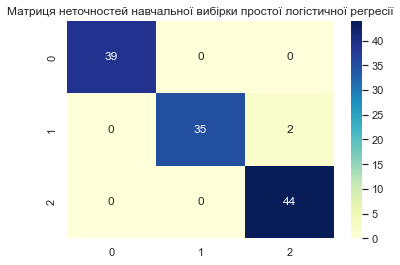

In [88]:
# спочатку попрацюємо з навчальною множиною

# матриця неточностей для простої моделі
y_pred_smpl_train = simple_lr.predict(X_train)
cnf_mtrx_train_smpl = metrics.confusion_matrix(y_train, y_pred_smpl_train)
ax = plt.axes()
sns.heatmap(pd.DataFrame(cnf_mtrx_train_smpl), annot=True, cmap="YlGnBu" ,fmt='g')
ax.set_title('Матриця неточностей навчальної вибірки простої логістичної регресії')
plt.show()

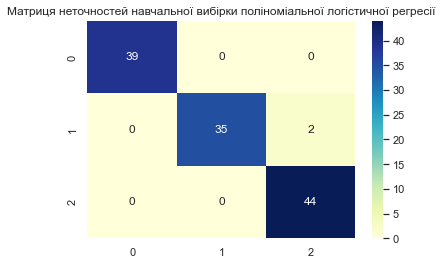

In [89]:
# матриця неточностей для поліноміальної моделі

y_pred_mlt_train = multi_lr.predict(X_train)
cnf_mtrx_train_mlt = metrics.confusion_matrix(y_train, y_pred_mlt_train)
ax_2 = plt.axes()
sns.heatmap(pd.DataFrame(cnf_mtrx_train_mlt), annot=True, cmap="YlGnBu" ,fmt='g')
ax_2.set_title('Матриця неточностей навчальної вибірки поліноміальної логістичної регресії')
plt.show()

In [90]:
# Правильність(Accuracy), Точність(Precision), Повнота(Recall), F-міра(F1-score) навчальної вибірки

print('Для простої моделі:')
print(metrics.classification_report(y_train, y_pred_smpl_train), end='\n\n\n')
print('Для поліномільної моделі:')
print(metrics.classification_report(y_train, y_pred_mlt_train))

Для простої моделі:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      0.95      0.97        37
           2       0.96      1.00      0.98        44

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



Для поліномільної моделі:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      0.95      0.97        37
           2       0.96      1.00      0.98        44

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



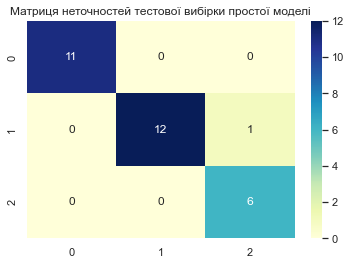

In [91]:
# тепер представимо результати критеріїв якості на валідаційній вибірці

# матриця неточностей
cnf_mtrx_smpl_test = metrics.confusion_matrix(y_test, y_pred_smpl)
ax_3 = plt.axes()
sns.heatmap(pd.DataFrame(cnf_mtrx_smpl_test), annot=True, cmap="YlGnBu" ,fmt='g')
ax_3.set_title('Матриця неточностей тестової вибірки простої моделі')
plt.show()

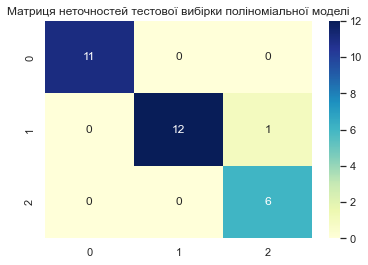

In [92]:
cnf_mtrx_mlt_test = metrics.confusion_matrix(y_test, y_pred_mlt)
ax_4 = plt.axes()
sns.heatmap(pd.DataFrame(cnf_mtrx_mlt_test), annot=True, cmap="YlGnBu" ,fmt='g')
ax_4.set_title('Матриця неточностей тестової вибірки поліноміальної моделі')
plt.show()

In [93]:
# Правильність(Accuracy), Точність(Precision), Повнота(Recall), F-міра(F1-score) валідаційної вибірки
print('Для простої моделі:')
print(metrics.classification_report(y_test, y_pred_smpl),end='\n\n\n')
print('Для поліноміальної моделі')
print(metrics.classification_report(y_test, y_pred_mlt))

Для простої моделі:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Для поліноміальної моделі
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [100]:
# ROC-крива будується для кожного класу окремо у випадку багатокласової класифікації

n_classes = 3
y_score = simple_lr.decision_function(X_test)
y_proba = simple_lr.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

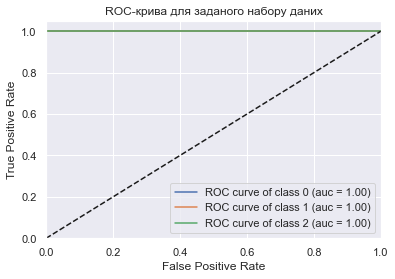

In [101]:
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (auc = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива для заданого набору даних')
plt.legend(loc="lower right")
plt.show()

In [102]:
# PR-крива для заданого набору даних буде будуватись для кожного класу окремо

n_classes = 3
y = label_binarize(y, classes=[0, 1, 2])
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_prob_smpl[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_prob_smpl[:, i])

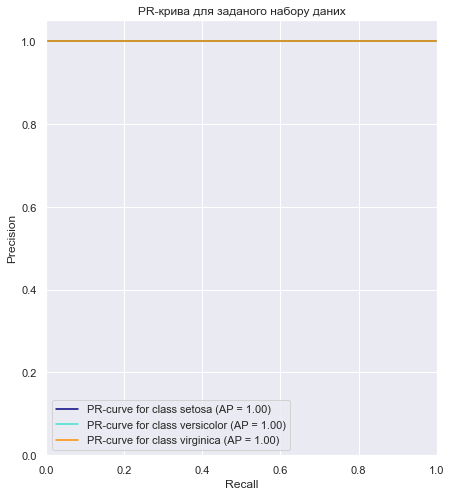

In [103]:
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal"])

_, ax = plt.subplots(figsize=(7, 8))

species = ['setosa', 'versicolor', 'virginica']
for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"PR-curve for class {species[i]}", color=color)

handles, labels = display.ax_.get_legend_handles_labels()
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("PR-крива для заданого набору даних")

plt.show()

### 9.Решітчастий пошук(Grid Search)

Згадаємо умову: ми встановили гіперпараметр solver='lbfgs'.
Даний гіперпараметр забезпечує регуляризацію моделі. Існує ще один гіперпараметр - penalty, і саме він не завжди сумісний
із гіперапараметром solver. Для таких випадків потрібно відкривати документацію і досліджувати поточне питання.
У нашому випадку гіперпараметр solver сумісний лише зі значеннями penalty=['l2', 'none'].
Тому очевидно, що для решітчастого пошуку ми не будемо використовувати підбір гіперпараметру penalty.
Використаємо гіперпараметр C - зворотня сила регуляризації(за замовчуванням =1)

In [104]:
import warnings
warnings.filterwarnings("ignore")


# решітчастий пошук для простої моделі
param_grid = {'C': np.logspace(-3,3,7)} 
gs_simple_lr = GridSearchCV(simple_lr, 
                     param_grid=param_grid,
                    scoring='accuracy',
                           cv=15)

gs_simple_lr.fit(X_train, y_train)
print("Найкраще значення гіперпараметра:", gs_simple_lr.best_params_)
modified_simple_lr = LogisticRegression(C=10)
modified_simple_lr.fit(X_train, y_train)
print('Правильність(Accuracy):', modified_simple_lr.score(X_test, y_test))
print(metrics.classification_report(y_test, modified_simple_lr.predict(X_test)))

Найкраще значення гіперпараметра: {'C': 10.0}
Правильність(Accuracy): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [105]:
# решітчастий пошук для поліноміальної моделі

gs_multi_lr = GridSearchCV(multi_lr, 
                     param_grid=param_grid,
                    scoring='accuracy',
                    cv=15)

gs_multi_lr.fit(X_train, y_train)
print("Найкраще значення гіперпараметра:", gs_multi_lr.best_params_)
modified_multi_lr = LogisticRegression(C=10, max_iter=10000)
modified_multi_lr.fit(X_train, y_train)
print('Правильність поліноміальної моделі з регуляризацією(Accuracy):', modified_multi_lr.score(X_test, y_test))
print(metrics.classification_report(y_test, modified_multi_lr.predict(X_test)))

Найкраще значення гіперпараметра: {'C': 10.0}
Правильність поліноміальної моделі з регуляризацією(Accuracy): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 10. Границі рішень(Decision Boundaries)

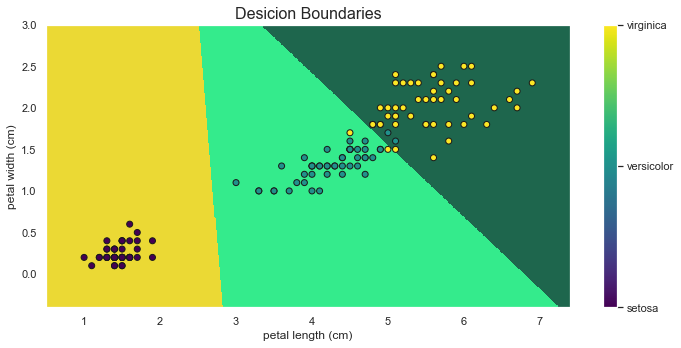

In [106]:
# виберемо дві ознаки з нашого датасету та побудуємо границі рішень
# я вирішила виокремити ознаки petal length i petal width

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#ebd934','#34eb8c','#1e664d'])

x_index = 2
y_index = 3
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])


x0, x1 = np.meshgrid(
    np.linspace(iris.data[:, x_index].min() -0.5, iris.data[:, x_index].max()+0.5, 500).reshape(-1, 1),
    np.linspace(iris.data[:, y_index].min()-0.5, iris.data[:, y_index].max()+0.5, 500).reshape(-1, 1)
)

X_new = np.c_[x0.ravel(), x1.ravel()]
simple_lr.fit(iris.data[:, [2, 3]], iris.target)
y_pred = simple_lr.predict(X_new)
zz = y_pred.reshape(x0.shape)

plt.figure(figsize=(10, 5))
#plt.ylim(0,3)
#plt.xlim(0, 8)
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=[iris.target], cmap='viridis', edgecolor='k')
plt.colorbar(ticks=[0, 1, 2], format=formatter)

plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.title('Desicion Boundaries', size=16)
plt.tight_layout()
plt.show()

### 11. Висновки про якість роботи моделей

Під час виконання роботи вдалося побудувати чотири моделі:
- просту логістичну регресію
- поліноміальну логістичну регресію
- просту логістичну регресію з регуляризацією
- поліноміальну логістичну регресію з регуляризацією

Варто провести трохи аналізу. За замовчуванням параметри LogisticRegression() у модулі Scikit-Learn мають такі значення:
- C = 1;
- solver = 'lbfgs'
- multi_class = 'multinomial'

Варіанти обох моделей без регуляризації дають однакові значення критеріїв якості. І навіть варіанти обох моделей із
регуляризацією дають кращі, але однакові(!) значення критеріїв якості. Можемо зробити висновок, що тип моделі на даному 
наборі даних не зіграв жодного впливу з ефектом оптимізації, а це значить, що найкращою моделлю серед побудованих
ми можемо вважати будь-яку із варіанту з регуляризації: там критерії якості набувають максимальних значень.
Тому за <b>найкращу модель я візьму поліноміальну з регуляризацією - <i>modified_multi_lr</i></b>

В наступному пункті саме вона і використовується.

### 12. Навчання моделі на підмножинах навчальної вибірки

In [107]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_train, y_train, test_size = 0.1)
modified_multi_lr.fit(X_train_1, y_train_1)

LogisticRegression(C=10, max_iter=10000)

In [108]:
y1 = modified_multi_lr.predict(X_test_1)
print(metrics.classification_report(y_test_1, y1))
metrics.accuracy_score(y_test_1, y1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.67      0.80         3
           2       0.80      1.00      0.89         4

    accuracy                           0.92        12
   macro avg       0.93      0.89      0.90        12
weighted avg       0.93      0.92      0.91        12



0.9166666666666666

In [109]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_train, y_train, test_size = 0.2)
modified_multi_lr.fit(X_train_2, y_train_2)

LogisticRegression(C=10, max_iter=10000)

In [110]:
y2 = modified_multi_lr.predict(X_test_2)
print(metrics.classification_report(y_test_2, y2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.88      0.93         8
           2       0.92      1.00      0.96        11

    accuracy                           0.96        24
   macro avg       0.97      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24



In [114]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_train, y_train, test_size = 0.3)
modified_multi_lr.fit(X_train_3, y_train_3)
y3 = modified_multi_lr.predict(X_test_3)
print(metrics.classification_report(y_test_3, y3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.92      0.96        13
           2       0.90      1.00      0.95         9

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.98      0.97      0.97        36



In [112]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_train, y_train, test_size = 0.4)
modified_multi_lr.fit(X_train_4, y_train_4)
y4 = modified_multi_lr.predict(X_test_4)
print(metrics.classification_report(y_test_4, y4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      1.00      0.97        16
           2       1.00      0.94      0.97        16

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



In [113]:
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_train, y_train, test_size = 0.5)
modified_multi_lr.fit(X_train_5, y_train_5)
y5 = modified_multi_lr.predict(X_test_5)
print(metrics.classification_report(y_test_5, y5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.88      0.93      0.90        15
           2       0.96      0.92      0.94        25

    accuracy                           0.95        60
   macro avg       0.94      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



### Висновки

У результаті опрацювання даного набору даних я навчилась розв'язувати задачу багатокласової класифікації.
Я ознайомилась з процесом розбиття даних на навчальний та валідаційний набори - у роботі застосувала метод train_test_split(),
а також з побудовою моделі, її навчанням на вибірці та прогнозуванням на значеннях валідаційної множини.
Після цього я здобула певні навички в обчисленнях критеріїв якості на навчальній та валідаційній множинах, зокрема матриці неточностей(побудована за допомогою методу heatmap модуля візуалізацій Seaborn) і таких метрик як точність, правильність, повнота та f1-міра за допомогою методу classification_report()
Обидві побудовані моделі - проста та поліноміальна дали однакові значення критеріїв якості. Після цього був реалізований процес регуляризації обох моделей. За допомогою решітчастого пошуку GridSearchCV() найкращим значенням параметра С = 10.
Дана модель була модифікована, були підраховані значенням критеріїв якості - вони збільшились. Варіанти обох моделей з регуляризацією можна вважати найкращими серед усіх реалізованих, адже вони обидві дають вищі, проте однакові результати порівняно з варіантами без регуляризації.
Було оцінено ймовірність перенавчання: на вказаному наборі даних перенавчання не спостерігається.
Було успішно побудовано границі рішень за двома ознаками - petal length i petal width.
Вибрана найкраща модель була навчена на підмножинах навчальної вибірки: кожного разу розмір валідаційної множини збільшувався на 10%. Результати зі збільшенням валідаційної підмножини дещо зменшувались: це може бути пов'язано з перенавчанням або ж недонавчанням.